In [1]:
import pandas as pd 
import numpy as np


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)


data = pd.read_csv("C:\\Users\\Dwarika\\Downloads\\banking.txt",sep=",")

In [2]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
#----------Convert Categorical Data to categories type
def convCategories(value):
    return data[value].astype('category')


#---------Remove all the duplicate Rows------------
data.drop_duplicates(keep='first',inplace=True)

#------------Describes about each Field-----------
def describeData(value):
    print(value.describe())

#------------Checks for any empty values and gives a count---
def checkEmpty(value):
    print(value.isnull().sum())

#-----------List the values in a field------------
def checkTypo(value):
    sort = value.value_counts()
    print(sort.sort_index())

#----------Removes Extra spaces from the field
def stripSpace(value):
    return data[value].str.strip()
    
#---------Converts all the values to lower case------
def convStrLow(value):
    return data[value].str.lower()

#---------Replaces Typo's in the field
def replaceString(value,old,new):
    return data[value].replace(old,new)

#---------List the values in in the field which is null
def filterData(value):
    print(data.loc[value.isnull(),:])

# List of categorical data
categorical_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome','day_of_week']

#----------Sanity Check----------
for i in categorical_list:
    print("-----------")
    print("Column Name: ",i)
    data[i] = stripSpace(i)
    print("-----------")
    data[i] = convStrLow(i)
    print("------Checking for Empty-----")
    checkEmpty(data[i])
    print("----Check for Typo's-------")
    checkTypo(data[i])
    print("-----------")
    data[i] = convCategories(i)
    print("-----Describe Data------")
    describeData(data[i])
    print("************")
    
# List of Measuring data
#measurement_list = ['campaign','previous','age','balance','day','duration', 'pdays','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed','y']
measurement_list = ['campaign','previous','age','duration', 'pdays','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']
 
#----------Sanity Check----------
for i in measurement_list:
    print("-----------")
    print("Column Name: ",i)
    print("------Checking for Empty-----")
    checkEmpty(data[i])
    print("-----Describe Data------")
    describeData(data[i])
    print("-----Filter Empty Data------------")
    filterData(data[i])
    print("************")
    
#data['education'] = replaceString('education',"basic.4y","basic")
#data['education'] = replaceString('education',"basic.6y","basic")
#data['education'] = replaceString('education',"basic.9y","basic")

-----------
Column Name:  job
-----------
------Checking for Empty-----
0
----Check for Typo's-------
admin.           10419
blue-collar       9253
entrepreneur      1456
housemaid         1060
management        2924
retired           1718
self-employed     1421
services          3967
student            875
technician        6739
unemployed        1014
unknown            330
Name: job, dtype: int64
-----------
-----Describe Data------
count      41176
unique        12
top       admin.
freq       10419
Name: job, dtype: object
************
-----------
Column Name:  marital
-----------
------Checking for Empty-----
0
----Check for Typo's-------
divorced     4611
married     24921
single      11564
unknown        80
Name: marital, dtype: int64
-----------
-----Describe Data------
count       41176
unique          4
top       married
freq        24921
Name: marital, dtype: object
************
-----------
Column Name:  education
-----------
------Checking for Empty-----
0
----Check for Typo

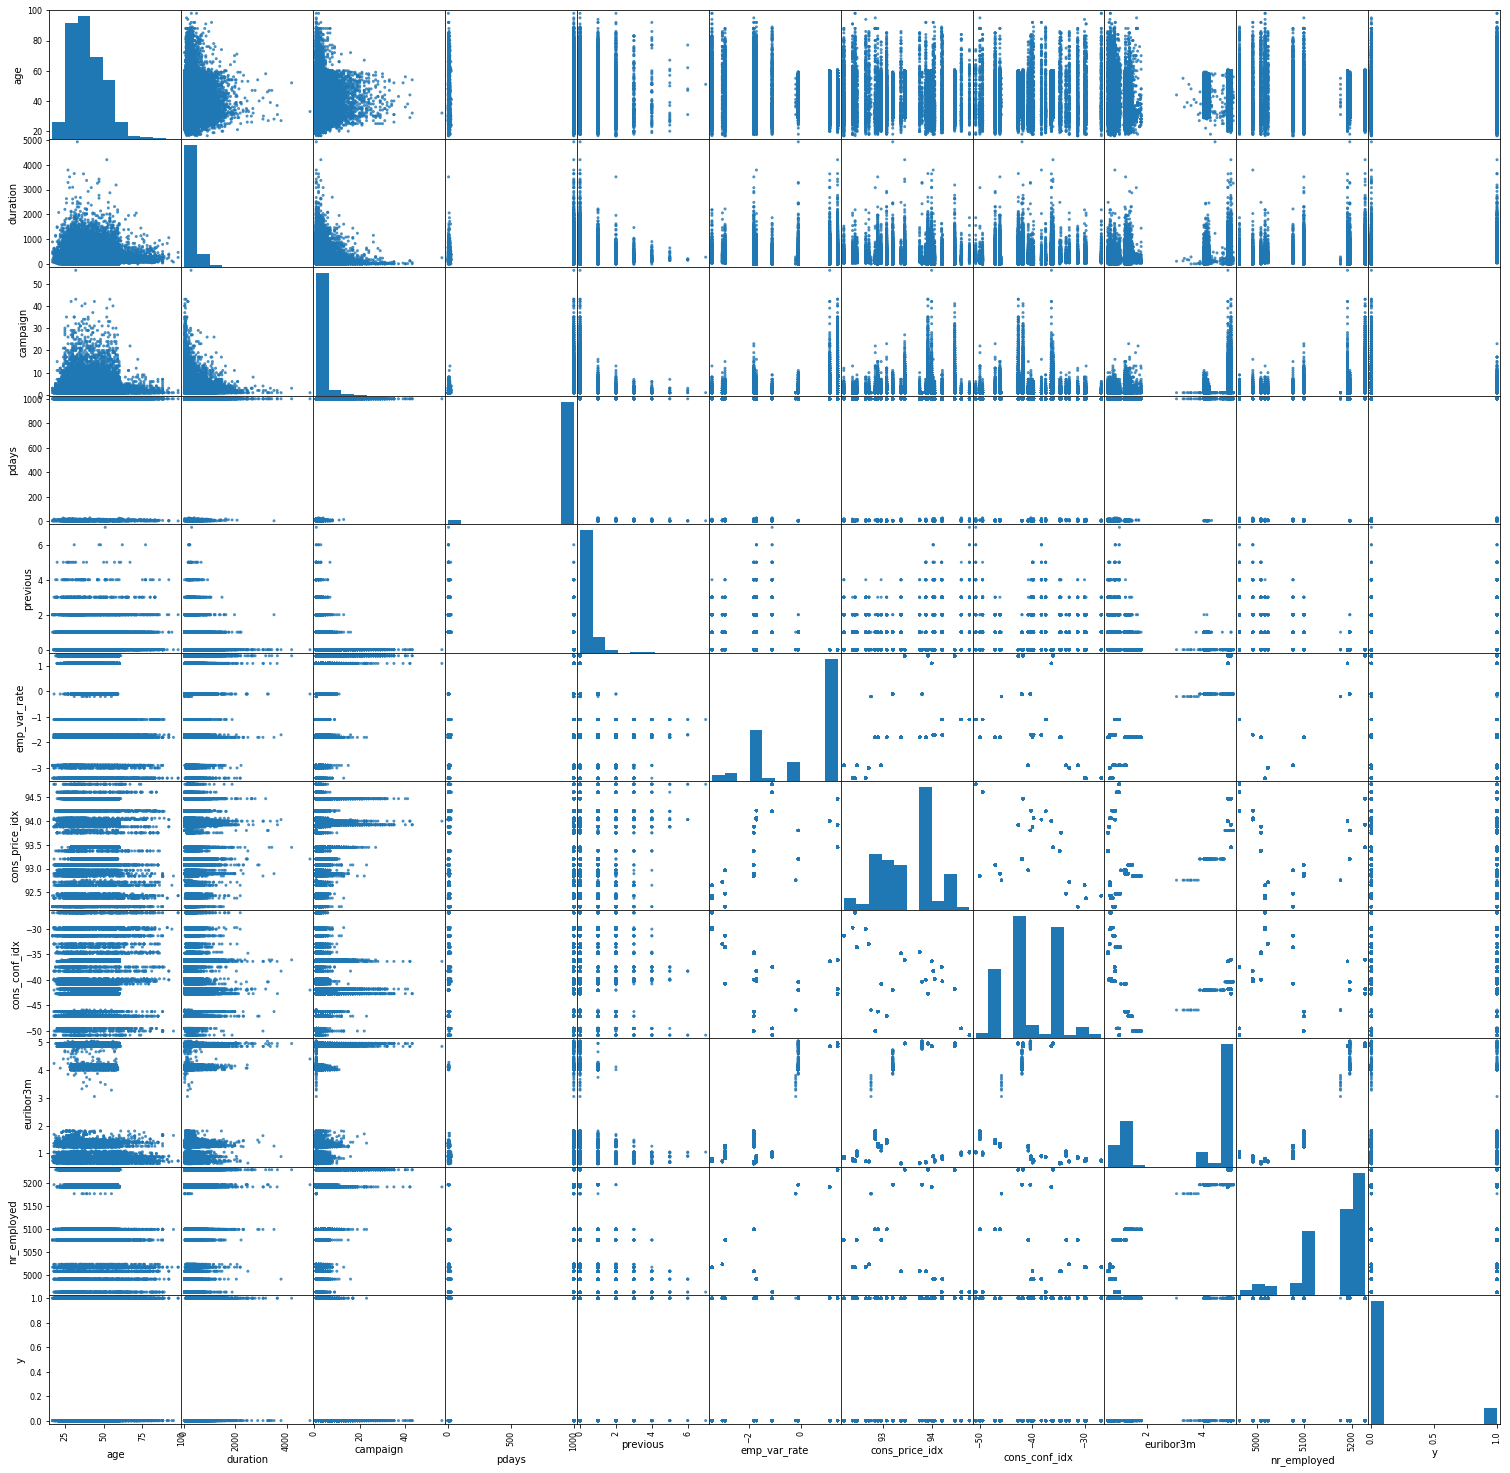

In [5]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(data,alpha=0.8,figsize=(26,26))
plt.show()

In [6]:
col = data.select_dtypes(['category']).columns
data[col+'_cdx'] = data[col].apply(lambda x: x.cat.codes)

In [7]:
#import matplotlib.pyplot as plt

features = data[['age', 'job_cdx', 'marital_cdx', 'education_cdx', 'default_cdx', 'housing_cdx', 'loan_cdx', 'contact_cdx', 'month_cdx',
       'day_of_week_cdx', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_cdx', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']]
target = data['y']

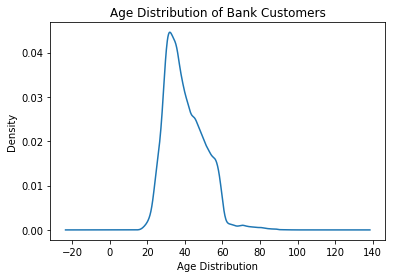

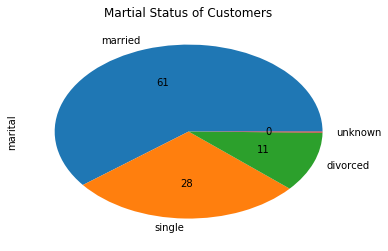

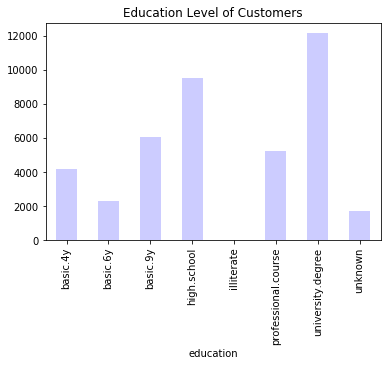

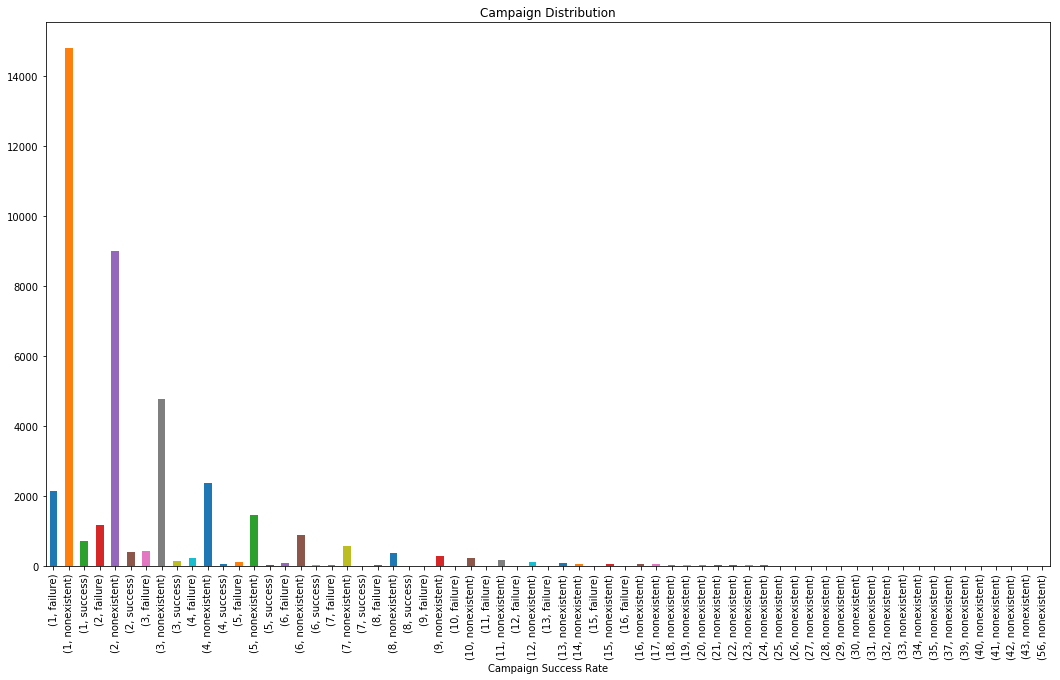

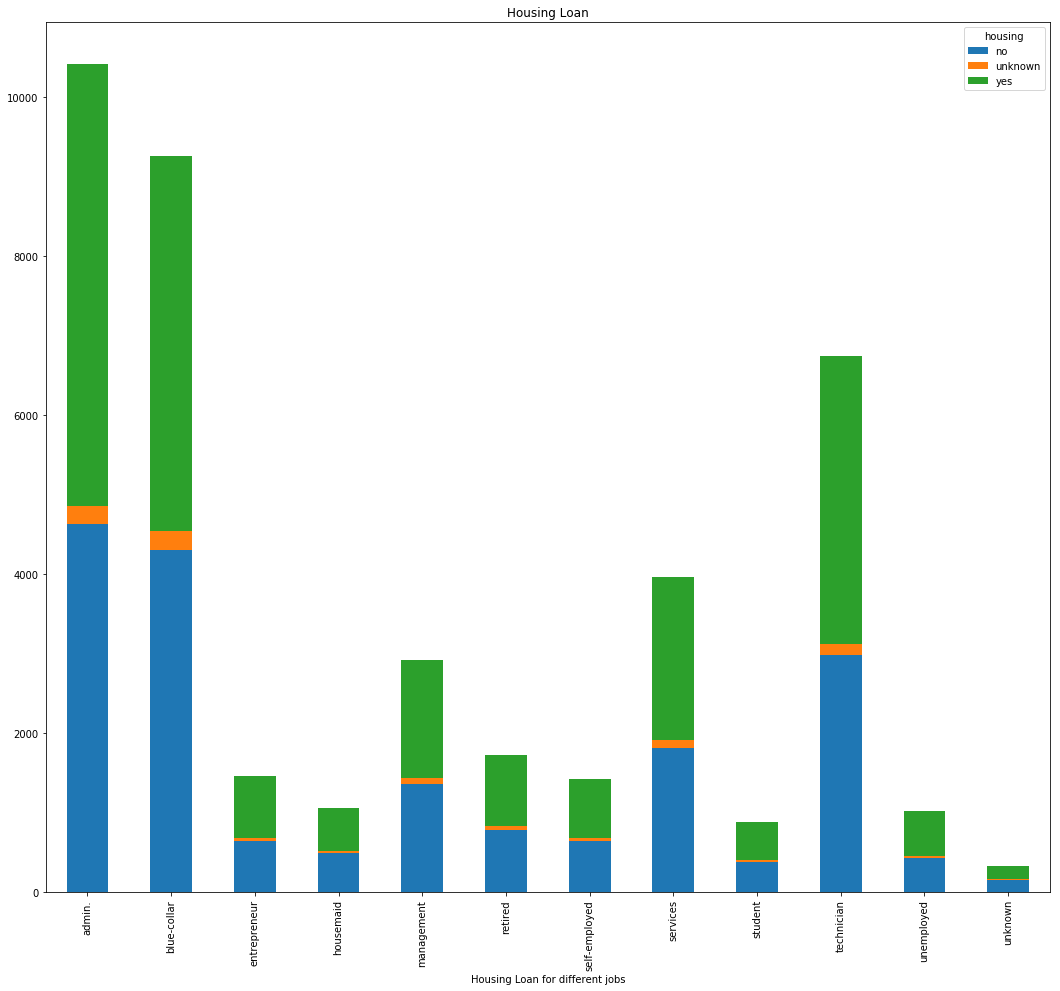

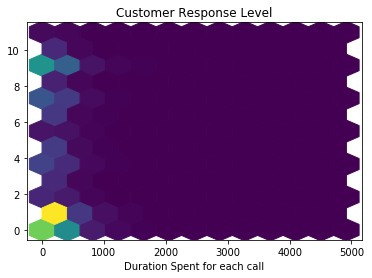

C:\Users\Dwarika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


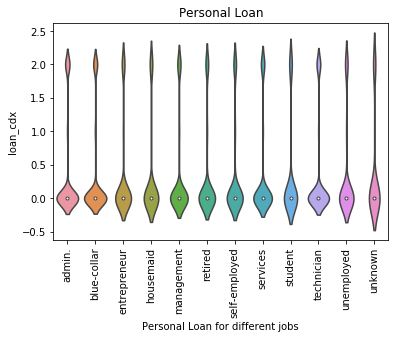

In [8]:
# Data Exploration

import matplotlib.pyplot as plt
import seaborn as sb


#for col in features.columns:
#    for i in range(1,2):
#        axes = plt.subplots(1, 3)
#        fig = plt.gcf()
#        fig.set_size_inches(16, 10)
#        sb.distplot(data[col],ax=axes[i][0])
#        #plt.show()
#        sb.boxplot(data[col],ax=axes[i][1])
#        #axes.pie(data[col], labels=labels, autopct='%1.1f%%', shadow=True,ax=axes[i][2])
#        pd.crosstab(data[col],data.y).plot(kind='bar',ax=axes[i][2],stacked=True)
#        plt.xticks(rotation=90)
#        plt.show()
#    print("\n")

edu_cnt = data.groupby('education')['education'].count()
camp_out = data.groupby(['campaign','poutcome'])['poutcome'].count()
job_hse = data.groupby(['job'])['housing'].count()
job_loan = data.groupby(['job'])['loan'].count()

data['age'].plot(kind='density')
plt.xlabel("Age Distribution")
plt.title("Age Distribution of Bank Customers")
plt.show()

data['marital'].value_counts().plot(kind='pie',autopct='%.0f')
plt.title("Martial Status of Customers")
plt.show()

edu_cnt.plot(kind='bar',alpha=0.2,color='blue')
plt.title("Education Level of Customers")
plt.show()


camp_out.plot(kind='bar',figsize=(18,10))
plt.xlabel("Campaign Success Rate")
plt.title("Campaign Distribution")
plt.show()


pd.crosstab(data['job'],data['housing']).plot(kind='bar',stacked=True,figsize=(18,16))
plt.xlabel("Housing Loan for different jobs")
plt.title("Housing Loan")
plt.show()

#data.boxplot(column='contact',by='job',rot=90,grid=False,notch=True)
plt.hexbin(data['duration'],data['job_cdx'],gridsize=12)
plt.xlabel("Duration Spent for each call")
plt.title("Customer Response Level")
plt.show()

sb.violinplot( x=data["job"], y=data["loan_cdx"])
plt.xticks(rotation=90)
plt.xlabel("Personal Loan for different jobs")
plt.title("Personal Loan")
plt.show()

#pd.box(column=data['job'],by=job_loan)
#plt.show()
#data.pivot(index='marital', columns='housing', values='loan')
#data.iloc[:,['marital','housing','loan']].plot.bar(stacked=True)
#data.head()
#data.boxplot(column='edu_cnt',by='loan')

In [9]:
from sklearn import model_selection
X_train_20, X_validation_20, Y_train_20, Y_validation_20 = model_selection.train_test_split(features, target, test_size=0.2, random_state=7)
X_train_40, X_validation_40, Y_train_40, Y_validation_40 = model_selection.train_test_split(features, target, test_size=0.4, random_state=7)
X_train_50, X_validation_50, Y_train_50, Y_validation_50 = model_selection.train_test_split(features, target, test_size=0.5, random_state=7)

In [10]:
# Model Selection

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
algo = []

algo.append(('KNN', KNeighborsClassifier()))
algo.append(('DST', DecisionTreeClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in algo:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train_20, Y_train_20, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

KNN: 0.906193 (0.005898)
DST: 0.889860 (0.004861)


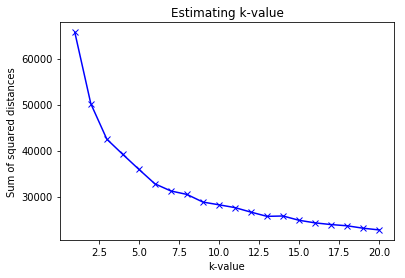

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

mins = MinMaxScaler()
mins.fit(features)
data_transformed = mins.transform(features)

Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k-value')
plt.ylabel('Sum of squared distances')
plt.title('Estimating k-value')
plt.show()


In [12]:
# Make predictions on validation dataset
knn = KNeighborsClassifier(n_neighbors=9,weights='distance',p=1)
knn.fit(X_train_20, Y_train_20)
predictions = knn.predict(X_validation_20)
print("KNN Testing Split 20")
print()
print(accuracy_score(Y_validation_20, predictions))
print(confusion_matrix(Y_validation_20, predictions))
print(classification_report(Y_validation_20, predictions))

KNN Testing Split 20

0.9061437591063624
[[6986  298]
 [ 475  477]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      7284
          1       0.62      0.50      0.55       952

avg / total       0.90      0.91      0.90      8236



In [13]:
# Make predictions on validation dataset
knn = KNeighborsClassifier(n_neighbors=9,weights='distance',p=1)
knn.fit(X_train_40, Y_train_40)
predictions = knn.predict(X_validation_40)
print("KNN Testing Split 40")
print()
print(accuracy_score(Y_validation_40, predictions))
print(confusion_matrix(Y_validation_40, predictions))
print(classification_report(Y_validation_40, predictions))

KNN Testing Split 40

0.9105093801226398
[[14087   567]
 [  907   910]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95     14654
          1       0.62      0.50      0.55      1817

avg / total       0.90      0.91      0.91     16471



In [14]:
# Make predictions on validation dataset
knn = KNeighborsClassifier(n_neighbors=9,weights='distance',p=1)
knn.fit(X_train_50, Y_train_50)
predictions = knn.predict(X_validation_50)
print("KNN Testing Split 50")
print()
print(accuracy_score(Y_validation_50, predictions))
print(confusion_matrix(Y_validation_50, predictions))
print(classification_report(Y_validation_50, predictions))

KNN Testing Split 50

0.9081503788614727
[[17584   706]
 [ 1185  1113]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95     18290
          1       0.61      0.48      0.54      2298

avg / total       0.90      0.91      0.90     20588



In [15]:
# Make predictions on validation dataset
dst = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=8)
dst.fit(X_train_20, Y_train_20)
predictions = dst.predict(X_validation_20)
print("DST Testing Split 20")
print()
print(accuracy_score(Y_validation_20, predictions))
print(confusion_matrix(Y_validation_20, predictions))
print(classification_report(Y_validation_20, predictions))

DST Testing Split 20

0.906386595434677
[[6921  363]
 [ 408  544]]
             precision    recall  f1-score   support

          0       0.94      0.95      0.95      7284
          1       0.60      0.57      0.59       952

avg / total       0.90      0.91      0.91      8236



In [16]:
# Make predictions on validation dataset
dst = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=8)
dst.fit(X_train_40, Y_train_40)
predictions = dst.predict(X_validation_40)
print("DST Testing Split 40")
print()
print(accuracy_score(Y_validation_40, predictions))
print(confusion_matrix(Y_validation_40, predictions))
print(classification_report(Y_validation_40, predictions))

DST Testing Split 40

0.9139700078926598
[[14100   554]
 [  863   954]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95     14654
          1       0.63      0.53      0.57      1817

avg / total       0.91      0.91      0.91     16471



In [17]:
# Make predictions on validation dataset
dst = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=8)
dst.fit(X_train_50, Y_train_50)
predictions = dst.predict(X_validation_50)
print("DST Testing Split 50")
print()
print(accuracy_score(Y_validation_50, predictions))
print(confusion_matrix(Y_validation_50, predictions))
print(classification_report(Y_validation_50, predictions))

DST Testing Split 50

0.9133475811152127
[[17589   701]
 [ 1083  1215]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95     18290
          1       0.63      0.53      0.58      2298

avg / total       0.91      0.91      0.91     20588

